Peter Goodwin
CMSC 320
Final Exam
12/7/2022

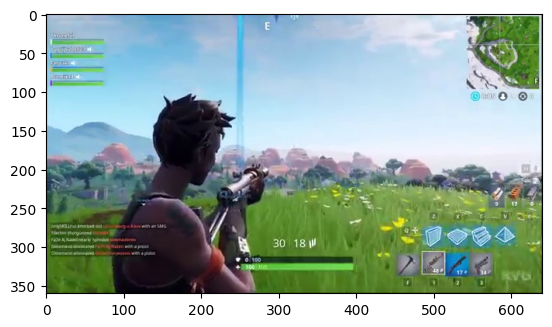

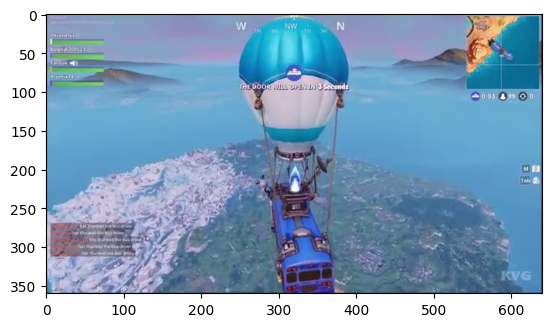

In [261]:
from matplotlib import pyplot as plt 
from matplotlib import image as mpimg
from statistics import mean 

# Code to display images
image = mpimg.imread("./images/frame2970.jpg")
plt.imshow(image)
plt.show()

image = mpimg.imread("./images/frame350.jpg")
plt.imshow(image)
plt.show()

A breif explanation...

For this project I will be examining data from various sources, relating to Fortnite. 
Fortnite is a video game in which many players are put on a single map and forced to fight with each other. While the game has various modes, I will be focussing on the free for all mode in which only a single player may reach first place. The match begins with all players on a flying bus. This bus flys across the map and the players may exit the bus and fly down to the ground when they choose. This allows players to move to areas of the map that are not populated with their competitors. Upon landing on the ground, the players must "loot" the various towns, houses, and other structures of the map for weapons, healing tools, etc. The "loot" they find will allow them to eliminate other players and reach a higher placement by the end of the match. Along with basic shooting functionality, players may also gather resources in order to build their own structures. By doing so they can protect themselves from gunfire, create bridges to access areas of the map that are inaccessible by foot. Finally, a crucial part of the game comes from the fact that over the course of the match, the map will close off. Meaning that after certain time benchmarks, a circles will form over the whole of the map, and at each bench mark, it will begin to shrink. This forces players to converge inside the circle so that the players must eventually face each other.

For the record, I have played this game before, and for a time I was quite engulfed by it. That is why I am interested in learning more about other players of the game. It is my hope that I can gain insight into a few questions...

1) How often do other players win a match?
2) Are there outside factors that may influence players to be better or worse at the game?
3) Do other players find it as difficult to win as I did?
4) Do other players improve over time.


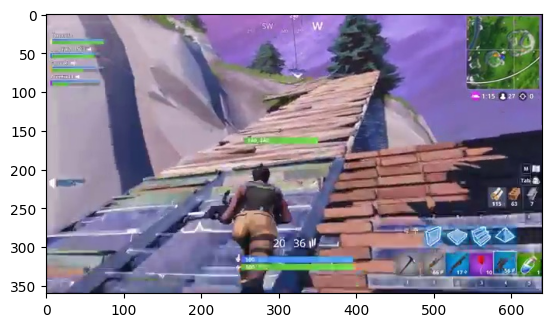

In [262]:
image = mpimg.imread("./images/frame19440.jpg")
plt.imshow(image)
plt.show()

While looking for data related to fortnite, I stumbled upon an interesting one. The data was a collection of one player's fortnite games, but it also included his mental state while playing. Specifically, this player recorded the date, time, his game statistics, as well as whether he was under the influence while playing. Upon seeing this I thought it would be interesting to evaluate this player against data recorded from other players. By doing so, we can find out whether his affected mental state would make him better, worse, or on par with other players. While the mental state of the other players is unknown, it will still be useful from a broad perspective. The data for the single player (including mental state) is below.

In [263]:
import pandas

bob = pandas.read_csv("./data/Fortnite Statistics.csv")
bob


,index,Date,Time of Day,Placed,Mental State,Eliminations,Assists,Revives,Accuracy,Hits,Head Shots,Distance Traveled,Materials Gathered,Materials Used,Damage Taken,Damage to Players,Damage to Structures
0,0,04/10,18:00,27,sober,2,0,0,0.23,14,2,271.08,20,20,272,331,621
1,1,04/10,18:00,45,sober,1,2,0,0.30,19,1,396.73,123,30,247,444,998
2,2,04/10,18:00,38,high,3,0,0,0.30,32,1,607.80,71,60,176,322,1109
3,3,04/10,19:00,30,high,1,3,0,0.18,19,1,714.16,244,10,238,330,4726
4,4,04/10,19:00,16,high,3,1,1,0.58,42,18,1140.00,584,150,365,668,2070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,82,17-Apr,12:00 AM,2,high,8,2,0,0.31,97,8,3770.00,1750,400,576,1492,4593
83,83,17-Apr,12:00 AM,24,high,4,0,0,0.20,12,4,222.54,94,0,96,478,2262
84,84,17-Apr,01:00 PM,30,sober,1,2,0,0.28,40,4,267.00,78,30,148,375,1196
85,85,17-Apr,02:00 PM,18,sober,3,2,1,0.26,25,3,954.43,370,60,354,475,1168


Date --	Date of the game. (Date)
Time of Day --	Time of day the game was played. (Time)
Placed --	Player's placement in the game. (Integer)
Mental State --	Player's mental state during the game. (String)
Eliminations --	Number of eliminations the player achieved. (Integer)
Assists --	Number of assists the player achieved. (Integer)
Revives --	Number of revives the player achieved. (Integer)
Accuracy --	Player's accuracy in the game. (Float)
Hits --	Number of hits the player achieved. (Integer)
Head Shots --	Number of head shots the player achieved. (Integer)
Distance Traveled --	Distance the player traveled in the game. (Float)
Materials Gathered --	Number of materials the player gathered. (Integer)
Materials Used --	Number of materials the player used. (Integer)
Damage Taken --	Amount of damage the player took. (Integer)
Damage to Players --	Amount of damage the player dealt to other players. (Integer)
Damage to Structures --	Amount of damage the player dealt to structures. (Integer)

As you can see from above, the player, let's call him Bob, recorded data from 87 games that he played at various times and dates. He also marks his rank in the game as well as other game stats. 

Next, in order to evaluate this player thoroughly, I will look at data related to many players as opposed to another single player. This new data will give me the overall performance of other players without some of the specifcs that Bob gave in his individual matches.

In [264]:
# data records statistics for 1435 players 
# It has columns related to different game modes, therefore I will limit it to the Solo Mode, as that is what the other data is focussed on.
avg_players = pandas.read_csv('./data/Fortnite_players_stats.csv')
avg_players.columns

Index(['Player', 'Solo score', 'Solo top1', 'Solo kd', 'Solo winRatio',
       'Solo matches', 'Solo kills', 'Solo minutesPlayed', 'Duos score',
       'Duos top1', 'Duos kd', 'Duos winRatio', 'Duos matches', 'Duos kills',
       'Duos minutesPlayed', 'Trios score', 'Trios top1', 'Trios kd',
       'Trios winRatio', 'Trios matches', 'Trios kills', 'Trios minutesPlayed',
       'Squads score', 'Squads top1', 'Squads kd', 'Squads winRatio',
       'Squads matches', 'Squads kills', 'Squads minutesPlayed', 'LTM score',
       'LTM top1', 'LTM top3', 'LTM kd', 'LTM winRatio', 'LTM matches',
       'LTM kills', 'LTM minutesPlayed'],
      dtype='object')

As you can see, there are many columns we do not need. Therefore I will edit the dataframe to include only data related to Solo matches, i.e. the first 8 columns.

In [265]:
# Drop last 29 columns of dataframe
n = 29
avg_players = avg_players.iloc[: , :-n]

avg_players

,Player,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed
0,Prospеring,2476763,1828,4.37,18.0,10150,36328,81389
1,BH nixxxay,439562,1694,8.71,29.1,5817,35895,12732
2,Raпger,4519465,4582,9.60,34.0,13488,85481,122171
3,Idk_Pi,752869,121,0.84,3.3,3687,3005,32453
4,Twitch.GryphonRB,1136282,1327,6.32,30.0,4429,19591,36245
...,...,...,...,...,...,...,...,...
1430,im bloom,106294,26,2.03,3.5,736,1440,4470
1431,Twitch kaOzs_,803918,396,3.42,13.2,3001,8911,27375
1432,slxyher,603939,310,1.69,5.1,6035,9679,20545
1433,RD-Antony,747295,71,1.10,1.9,3763,4048,31147


Now we have a dataframe that is bound by Solo matches, on par with our other data. It also has columns that we can use to compare against Bob.

It should be noted that there are issues with using these various sets of data. For one, they were recorded at different times. I cannot be sure if the players were cheating. I cannot be sure that the self reported data from Bob is 100% accurate. Yet despite these issues, the game has not changed its mechanics since its inception, therefore I will assume them to be reasonably accurate and useful.

Since we have collected or data and eliminated irrelevant columns, I would now like to create a separate dataframe with some new columns for Bob. Firstly I will add a kill/death ratio for Bob, as he only has his kills listed and our avg_players has a kill death ratio. This will allow us to compare them better. We will also create a win loss ratio for Bob.

In [266]:
#Create new dataframe to house bobs data.
bob_data = pandas.DataFrame()

# This was taken over 87 games so the k/d = total eliminations/ 87
kills = bob['Eliminations'].sum()
bob_data['K/D'] = [kills/87]

# Number of wins - placed 1st
wins = 0
for x in bob['index']:
    if (bob['Placed'][x] == 1):
        wins += 1
        
bob_data['Total Wins'] = [wins]
bob_data['Total Win/Loss'] = [(wins/87)]



Next I will add a column for his K/D, while sober, and while under the influence.

In [267]:
# sober_kills marks all kills made during sober play
# count marks number of sober games out of the total 87
sober_kills = 0
accuracy_sober = 0
count = 0
wins_sober = 0
distance_sober =0
for x in bob['index']:
    if (bob['Mental State'][x] == 'sober'):
        count += 1
        sober_kills += bob['Eliminations'][x]
        accuracy_sober += bob['Eliminations'][x]
        distance_sober += bob['Distance Traveled'][x]
        if(bob['Placed'][x] == 1):
            wins_sober += 1
        
bob_data['Sober kills'] = [sober_kills]
bob_data['Sober games'] = [count]
bob_data['Sober k/D'] = [(sober_kills/count)]
bob_data['Sober accuracy'] = [(accuracy_sober/count)]
bob_data['Sober wins'] = [wins_sober]
bob_data['Sober distance'] = [distance_sober]


In [268]:
# I will now repeat the process for games made while under the influence
high_kills = 0
accuracy_high = 0
count = 0
wins_high = 0
distance_high =0
for x in bob['index']:
    if (bob['Mental State'][x] == 'high'):
        count += 1
        high_kills += bob['Eliminations'][x]
        accuracy_high += bob['Accuracy'][x]
        distance_high += bob['Distance Traveled'][x]
        if(bob['Placed'][x] == 1):
            wins_high += 1
        
bob_data['High kills'] = [high_kills]
bob_data['High games'] = [count]
bob_data['High k/D'] = [(high_kills/count)]
bob_data['High accuracy'] = [(accuracy_high/count)]
bob_data['High wins'] = [wins_high]
bob_data['High Distance'] = [distance_high]

# Display the data
bob_data

,K/D,Total Wins,Total Win/Loss,Sober kills,Sober games,Sober k/D,Sober accuracy,Sober wins,Sober distance,High kills,High games,High k/D,High accuracy,High wins,High Distance
0,2.517241,3,0.034483,114,45,2.533333,2.533333,1,52598.42,105,42,2.5,0.245238,2,46333.31


<big>Insights so far...<big>

From the above dataframe it becomes clear that the difference between high and sober mental state is miniscule. The results show that of the 3 wins that Bob had (i.e. placing first in a match), Bob won more games while high. Yet he was less accurate (i.e. of the shots he took, he hit less targets) while high. The only real difference between him being high and sober was his distance traveled. In this game, distance can mean a few things. For one, a player that decides to hide for the duration of the match, instead of actively pursuing other players, may have a smaller distance traveled. On the other hand, given that the map closes of portions of itself and forces players to move, at times, can affect wether or not we can see if Bob tried hiding during most matches.

Now let's compare some of our values for Bob against our avg_players dataframe from before...

In [269]:
print("Average Player K/D")
print(avg_players['Solo kd'].mean())
print("Bob's K/D")
print(bob_data['K/D'][0])
print("Bob's Sober K/D")
print(bob_data['Sober k/D'][0])
print("Bob's High K/D")
print(bob_data['High k/D'][0])

Average Player K/D
1.8162996515679442
Bob's K/D
2.5172413793103448
Bob's Sober K/D
2.533333333333333
Bob's High K/D
2.5


According to this, Bob actually gets more kills per death than the average player, so let us look into Bob a bit more.

In [270]:
# Lets start by looking at Bob's original data once again
bob

,index,Date,Time of Day,Placed,Mental State,Eliminations,Assists,Revives,Accuracy,Hits,Head Shots,Distance Traveled,Materials Gathered,Materials Used,Damage Taken,Damage to Players,Damage to Structures
0,0,04/10,18:00,27,sober,2,0,0,0.23,14,2,271.08,20,20,272,331,621
1,1,04/10,18:00,45,sober,1,2,0,0.30,19,1,396.73,123,30,247,444,998
2,2,04/10,18:00,38,high,3,0,0,0.30,32,1,607.80,71,60,176,322,1109
3,3,04/10,19:00,30,high,1,3,0,0.18,19,1,714.16,244,10,238,330,4726
4,4,04/10,19:00,16,high,3,1,1,0.58,42,18,1140.00,584,150,365,668,2070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,82,17-Apr,12:00 AM,2,high,8,2,0,0.31,97,8,3770.00,1750,400,576,1492,4593
83,83,17-Apr,12:00 AM,24,high,4,0,0,0.20,12,4,222.54,94,0,96,478,2262
84,84,17-Apr,01:00 PM,30,sober,1,2,0,0.28,40,4,267.00,78,30,148,375,1196
85,85,17-Apr,02:00 PM,18,sober,3,2,1,0.26,25,3,954.43,370,60,354,475,1168


There is an issue here, as the format for the date is varied (either all numbers or some letters)
So I will start by replacing the lettered dates with numbered dates.

In [271]:
# Since there are only two values that are out of format I will replace them individually.
bob['Date'] = bob['Date'].replace(['16-Apr'], '04/16')
bob['Date'] = bob['Date'].replace(['17-Apr'], '04/17')


Now that the date format is standardized across all rows of Bob's data, I will start grouping and plotting his performance over time

In [272]:
df = pandas.DataFrame({'Date': bob['Date'], 'Kills': bob['Eliminations']})

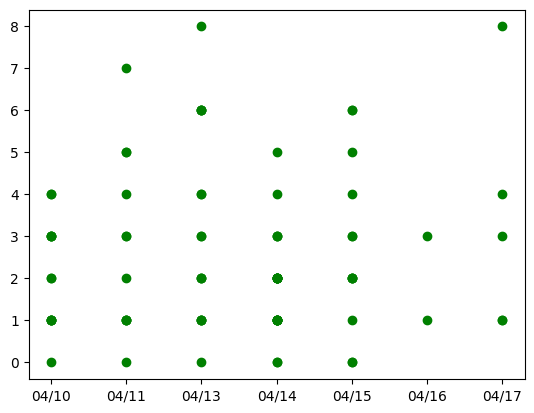

In [273]:
from matplotlib import pyplot as plt 



plt.plot(df['Date'], df['Kills'], 'go')

This doesn't seem to visualize the data very well so I will convert the chart to a bar grapha and add labels to the axes.

Text(0.5, 1.0, 'Kills over Time (By Day)')

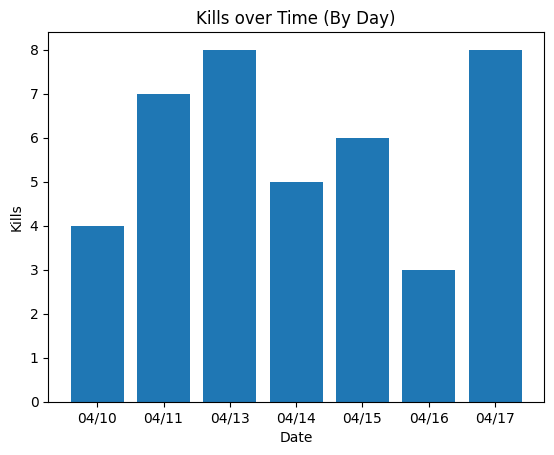

In [274]:
plt.bar(df['Date'], df['Kills'])
plt.xlabel('Date')
plt.ylabel('Kills')
plt.title('Kills over Time (By Day)')

From this, it seems that there was no real improvement over time. It seems as though the skill of Bob was somewhat random.
Let us look deeper and evaluate his kills over time by the hour rather than by the date.

In [275]:
df = pandas.DataFrame({'Date': bob['Date'], 'Kills': bob['Eliminations'], 'Time': bob["Time of Day"]})
l = df.groupby('Date')

for item, i in l:
    print(item)
    print(i)
    

04/10
     Date  Kills   Time
0   04/10      2  18:00
1   04/10      1  18:00
2   04/10      3  18:00
3   04/10      1  19:00
4   04/10      3  19:00
5   04/10      0  19:00
6   04/10      3  19:00
7   04/10      2  19:00
8   04/10      4  19:00
9   04/10      1  20:00
10  04/10      1  20:00
11  04/10      3  20:00
12  04/10      1  20:00
13  04/10      4  20:00
04/11
     Date  Kills   Time
14  04/11      4  13:00
15  04/11      5  14:00
16  04/11      3  14:00
17  04/11      1  14:00
18  04/11      3  14:00
19  04/11      1  14:00
20  04/11      7  15:00
21  04/11      2  20:00
22  04/11      0  20:00
23  04/11      5  20:00
24  04/11      1  21:00
25  04/11      1  21:00
04/13
     Date  Kills   Time
26  04/13      4  13:00
27  04/13      1  13:00
28  04/13      6  14:00
29  04/13      2  14:00
30  04/13      8  14:00
31  04/13      0  15:00
32  04/13      2  15:00
33  04/13      1  15:00
34  04/13      1  18:00
35  04/13      3  18:00
36  04/13      3  19:00
37  04/13      6  19:0

Date
04/10    AxesSubplot(0.125,0.11;0.775x0.77)
04/11    AxesSubplot(0.125,0.11;0.775x0.77)
04/13    AxesSubplot(0.125,0.11;0.775x0.77)
04/14    AxesSubplot(0.125,0.11;0.775x0.77)
04/15    AxesSubplot(0.125,0.11;0.775x0.77)
04/16    AxesSubplot(0.125,0.11;0.775x0.77)
04/17    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

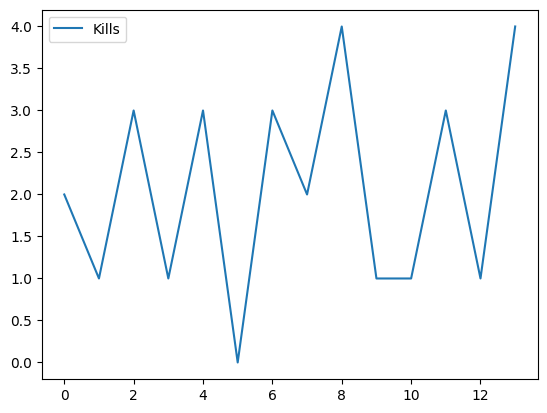

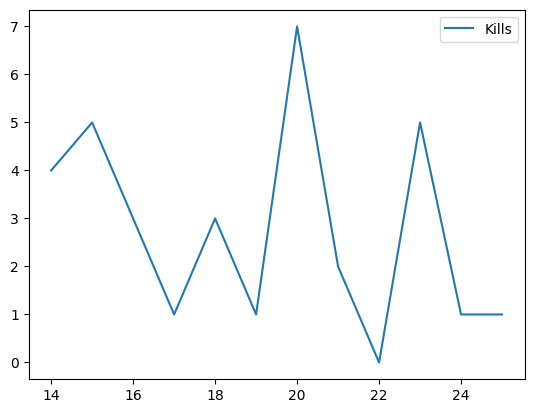

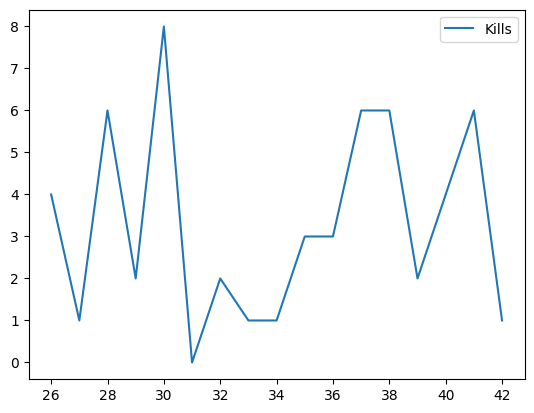

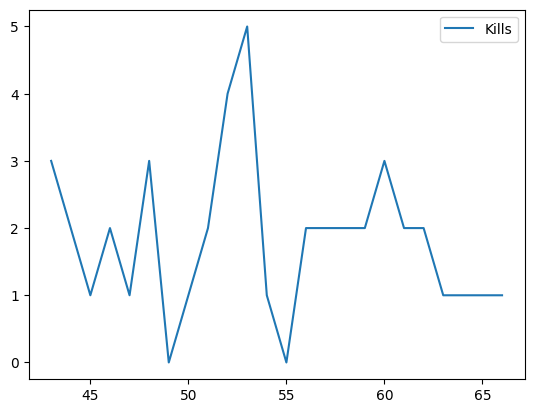

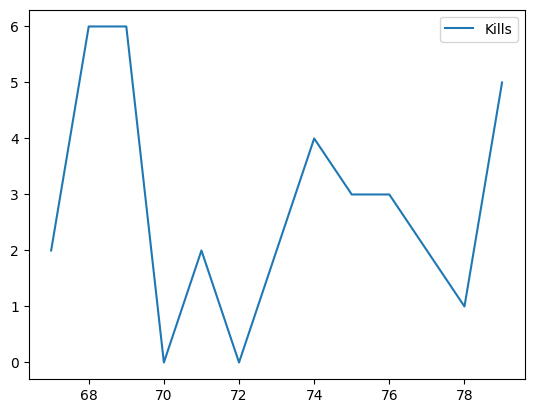

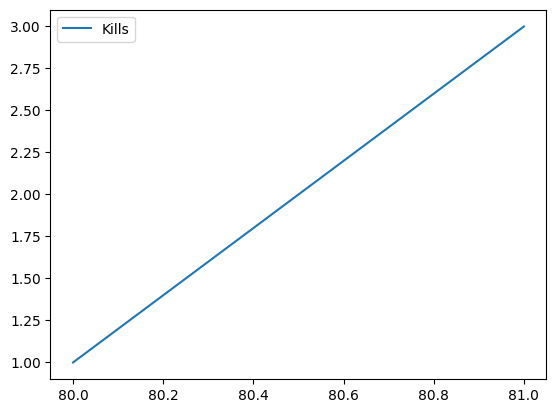

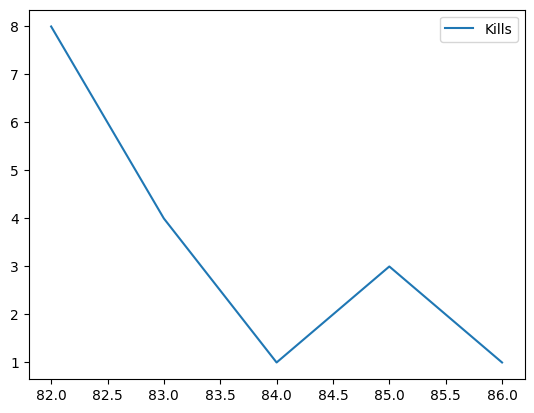

In [276]:
l.plot()


These plots continue to demonstrate no real correlation towards improvement over time. Most days are back and forth. Apart from the last two days, there is no real progression that is positive or negative.

Given that we have analyzed Bob's stats I would now like to compare him to the other players that we had brought up at the begining of the tutorial.
I will display the dataframe associated with them below.

In [277]:
avg_players

,Player,Solo score,Solo top1,Solo kd,Solo winRatio,Solo matches,Solo kills,Solo minutesPlayed
0,Prospеring,2476763,1828,4.37,18.0,10150,36328,81389
1,BH nixxxay,439562,1694,8.71,29.1,5817,35895,12732
2,Raпger,4519465,4582,9.60,34.0,13488,85481,122171
3,Idk_Pi,752869,121,0.84,3.3,3687,3005,32453
4,Twitch.GryphonRB,1136282,1327,6.32,30.0,4429,19591,36245
...,...,...,...,...,...,...,...,...
1430,im bloom,106294,26,2.03,3.5,736,1440,4470
1431,Twitch kaOzs_,803918,396,3.42,13.2,3001,8911,27375
1432,slxyher,603939,310,1.69,5.1,6035,9679,20545
1433,RD-Antony,747295,71,1.10,1.9,3763,4048,31147


I would first like to examine the layout of players by graphing their K/D.

Text(0.5, 1.0, 'K/D by Player')

C:\Users\Peter Goodwin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  func(*args, **kwargs)
C:\Users\Peter Goodwin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26364 (\N{CJK UNIFIED IDEOGRAPH-66FC}) missing from current font.
  func(*args, **kwargs)
C:\Users\Peter Goodwin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24052 (\N{CJK UNIFIED IDEOGRAPH-5DF4}) missing from current font.
  func(*args, **kwargs)
C:\Users\Peter Goodwin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 31934 (\N{CJK UNIFIED IDEOGRAPH-7CBE}) missing from current font.
  func(*args, **kwargs)
C:\Users\Peter Goodwin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 31070 (\N{CJK UNIFIED IDEOGRAPH-795E}) missing from current font.
  f

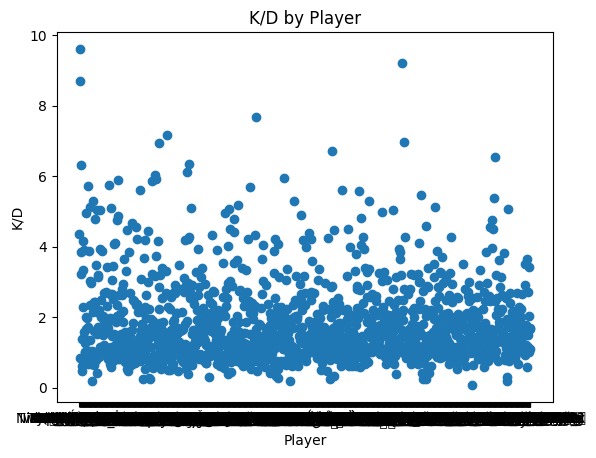

In [286]:
df = pandas.DataFrame({'Player': avg_players['Player'], 'K/D': avg_players['Solo kd']})
plt.scatter(df['Player'], df['K/D'])
plt.xlabel('Player')
plt.ylabel('K/D')
plt.title('K/D by Player')

As you can see from above, with the K/D on the y axis and the players on the x axis, there are not many players that have a K/D that much greater than Bob. But, lets look at it in a different way.

Text(0.5, 1.0, 'K/D by Player')

C:\Users\Peter Goodwin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from current font.
  func(*args, **kwargs)
C:\Users\Peter Goodwin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26364 (\N{CJK UNIFIED IDEOGRAPH-66FC}) missing from current font.
  func(*args, **kwargs)
C:\Users\Peter Goodwin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 24052 (\N{CJK UNIFIED IDEOGRAPH-5DF4}) missing from current font.
  func(*args, **kwargs)
C:\Users\Peter Goodwin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 31934 (\N{CJK UNIFIED IDEOGRAPH-7CBE}) missing from current font.
  func(*args, **kwargs)
C:\Users\Peter Goodwin\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 31070 (\N{CJK UNIFIED IDEOGRAPH-795E}) missing from current font.
  f

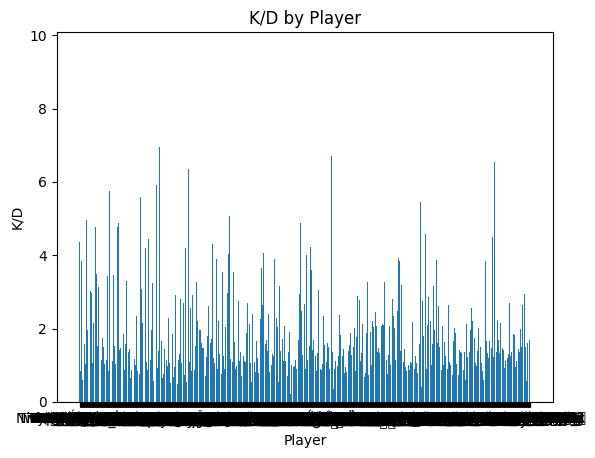

In [285]:
plt.bar(df['Player'], df['K/D'])


plt.xlabel('Player')
plt.ylabel('K/D')
plt.title('K/D by Player')

<big>Insights<big>

I began this tutorial by looking at Bob. Bob had recorded his own data from some of his games over the course of a week or so. His data included a column specifying his mental state. After analyzing him and splitting the data by his mental state, it became clear that being under the influence did not detriment him, nor give him an advantage at playing the game. Upon further analysis of his progress over time (by plotting his kills by day and then by hour and day) we saw no clear progression in any direction. One could argue that they could roll an 8 sided die to get the number of kills he had for the day (of the game matches he played). 

After looking at Bob's data, I compared him to the csv containing a collection of over 1000 random players. Upon plotting their K/D's as well as getting the average of those K/D's, we saw that Bob was above average. Yet he was far below some of the outliers of the avg_players dataframe. 

This tells me that this game is quite hard. I did not include it here, but I have looked at the top fortnite players from the Fortnite website and they are far above Bob and the average players. 

This leads me to no indefinite conclusion other than the fact that there are some players that are very good with the unique mechanics of this game (building for example). Given that the average K/D for the players and Bob was short of 3 means that each player in a match is relatively equal to the other players in the match. 

I hope to do more research on Bob and other fortnite players to try and find insight as to how to be better at the game, and I hope you enjoyed this tutorial and some of the information procured from it as much as I have.